# Estadística Inferencial

## 1. Estimadores y sus Propiedades

Un **estimador** es una función de la muestra que se utiliza para aproximar un parámetro poblacional.

### Ejemplos de estimadores:
- Media muestral $\bar{X} $ estima la media poblacional $\mu$
- Varianza muestral $S^2$ estima la varianza poblacional $\sigma^2$

### Propiedades deseables de los estimadores:
- **Insesgadez**: $\mathbb{E}[\hat{\theta}] = \theta$
- **Consistencia**: $\hat{\theta} \xrightarrow{p} \theta$ conforme $n \to \infty$
- **Eficiencia**: menor varianza entre todos los estimadores insesgados
- **Suficiencia**: resume toda la información relevante de la muestra respecto al parámetro


## 2. Intervalos de Confianza

Un **intervalo de confianza (IC)** es un rango de valores que probablemente contenga el valor verdadero del parámetro poblacional con una cierta probabilidad (nivel de confianza).

### Intervalo de confianza para la media cuando $\sigma$ es desconocida:

Para muestras grandes o uso de la t de Student:

$$\left( \bar{x} - t_{\alpha/2} \cdot \frac{s}{\sqrt{n}}, \ \bar{x} + t_{\alpha/2} \cdot \frac{s}{\sqrt{n}} \right)$$


In [ ]:
import numpy as np
from scipy import stats

# Simulación de muestra
np.random.seed(0)
muestra = np.random.normal(loc=50, scale=10, size=30)

media = np.mean(muestra)
desv = np.std(muestra, ddof=1)
n = len(muestra)
confianza = 0.95

t_critico = stats.t.ppf(1 - (1 - confianza)/2, df=n-1)
margen_error = t_critico * (desv / np.sqrt(n))

li = media - margen_error
ls = media + margen_error

# Salida más legible
print(f"Intervalo de confianza del 95% para la media: ({li:.2f}, {ls:.2f})")

Intervalo de confianza del 95% para la media: (50.32, 58.54)


## 3. Pruebas de Hipótesis

Es un procedimiento estadístico para decidir si aceptamos o rechazamos una afirmación sobre un parámetro poblacional.

### Elementos clave:

- **Hipótesis nula (H₀)**: afirmación que se quiere contrastar
- **Hipótesis alternativa (H₁)**: lo que se plantea si se rechaza H₀
- **Estadístico de prueba**: valor calculado a partir de la muestra
- **Valor-p (p-value)**: probabilidad de obtener un resultado al menos tan extremo como el observado, bajo H₀
- **Nivel de significancia** \( \alpha \): umbral para rechazar H₀ (típicamente 0.05)

### Tipos de prueba:
- Prueba bilateral: $H_0: \mu = \mu_0, \ H_1: \mu \neq \mu_0$
- Prueba unilateral izquierda: $ H_0: \mu \geq \mu_0 \, \ H_1: \mu < \mu_0$
- Prueba unilateral derecha:  $H_0: \mu \leq \mu_0 \, \ H_1: \mu > \mu_0$


In [ ]:
# Prueba t de una muestra
mu_hipotesis = 52
t_stat, p_value = stats.ttest_1samp(muestra, mu_hipotesis)

print(f"Estadístico t: {t_stat:.3f}")
print(f"Valor p: {p_value:.3f}")

alpha = 0.05
if p_value < alpha:
    print("Se rechaza H0: la media es significativamente distinta de", mu_hipotesis)
else:
    print("No se rechaza H0: no hay evidencia suficiente para decir que la media es distinta de", mu_hipotesis)

Estadístico t: 1.209
Valor p: 0.236
No se rechaza H0: no hay evidencia suficiente para decir que la media es distinta de 52


## Población y Parámetros Poblacionales

### ¿Qué es una población?

En estadística, una **población** es el conjunto completo de elementos (personas, objetos, eventos, etc.) sobre el cual se desea hacer inferencias o extraer conclusiones.

- Ejemplo: Todos los estudiantes de una universidad, todas las mediciones de temperatura en una ciudad durante un año, etc.

### Parámetros poblacionales

Los **parámetros poblacionales** son valores numéricos que describen características de la población.

| Parámetro         | Símbolo usual | Descripción                         |
|------------------|----------------|-------------------------------------|
| Media poblacional | $\mu$         | Promedio de la población             |
| Varianza poblacional | $\sigma^2$ | Dispersión de los datos de la población |
| Proporción poblacional |  $p$     | Porcentaje de éxito o característica |

> En la práctica, los parámetros **no se conocen** porque no se puede observar a toda la población.


### ¿Por qué usamos muestras?

Como acceder a toda la población es costoso o imposible, se toma una **muestra aleatoria** y se usan **estadísticos** (valores calculados con la muestra) para estimar los parámetros poblacionales.

| Estadístico         | Símbolo     | Estima a...        |
|---------------------|-------------|---------------------|
| Media muestral      |  $\bar{X}$  | \( \mu \)           |
| Varianza muestral   |    $S^2$    | \( \sigma^2 \)      |
| Proporción muestral |   $\hat{p}$ | \( p \)             |


### Ejemplo en Python: simulando una población y extrayendo muestras

Supongamos que tenemos una población ficticia de 10,000 personas con una altura media de 170 cm y desviación estándar de 10 cm.


Media poblacional (μ): 169.98 cm


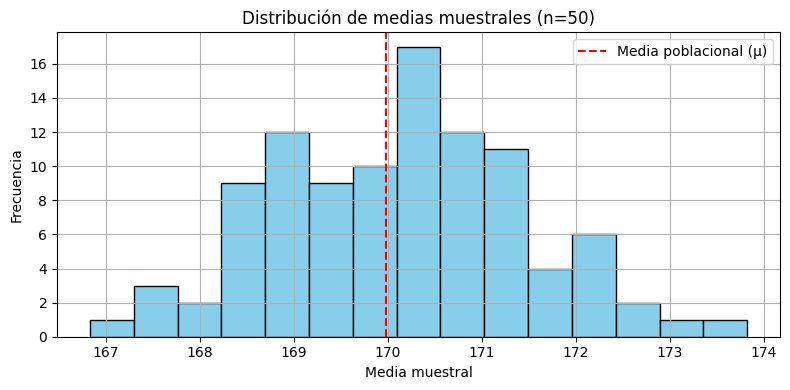

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulamos una población grande (tamaño 10,000)
np.random.seed(42)
poblacion = np.random.normal(loc=170, scale=10, size=10000)

# Parámetros poblacionales reales (conocidos porque es simulación)
media_poblacional = np.mean(poblacion)
print(f"Media poblacional (μ): {media_poblacional:.2f} cm")

# Tomamos 100 muestras de tamaño 50 y calculamos su media
medias_muestrales = []
for _ in range(100):
    muestra = np.random.choice(poblacion, size=50, replace=False)
    medias_muestrales.append(np.mean(muestra))

# Gráfica de distribución de medias muestrales
plt.figure(figsize=(8, 4))
plt.hist(medias_muestrales, bins=15, color="skyblue", edgecolor="black")
plt.axvline(media_poblacional, color='red', linestyle='--', label='Media poblacional (μ)')
plt.title("Distribución de medias muestrales (n=50)")
plt.xlabel("Media muestral")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Estimadores y Métodos de Estimación

En inferencia estadística, un **estimador** es una regla o fórmula que se aplica a los datos muestrales para inferir un parámetro poblacional desconocido.

### Estimador insesgado

Un estimador $\hat{\theta}$ es **insesgado** si, en promedio, acierta con el valor verdadero del parámetro $\theta$:

$$\mathbb{E}[\hat{\theta}] = \theta$$

> Ejemplo clásico: La media muestral $\bar{X}$ es un estimador insesgado de la media poblacional $\mu$.

### Estimador de Máxima Verosimilitud (EMV)

El **EMV** busca el valor del parámetro que **maximiza la verosimilitud** de haber observado los datos muestrales. Se basa en la función:

$$L(\theta) = \prod_{i=1}^n f(x_i \mid \theta)$$

Se suele trabajar con la **log-verosimilitud**:

$$\ell(\theta) = \log L(\theta) = \sum_{i=1}^n \log f(x_i \mid \theta)$$

### Método de los Momentos

Este método iguala los **momentos poblacionales** teóricos con los **momentos muestrales**:

$$\text{Ejemplo (1er momento)}: \quad \mathbb{E}[X] = \bar{X}$$

> Se pueden usar más momentos si hay más parámetros.

### Ejemplo en Python: estimando parámetro de una exponencial

Supón que los datos provienen de una distribución exponencial:

$$f(x \mid \lambda) = \lambda e^{-\lambda x}, \quad x \geq 0$$

Tanto el EMV como el método de los momentos estiman:

$$\hat{\lambda} = \frac{1}{\bar{X}}$$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Simulamos una muestra de una exponencial con λ = 2
np.random.seed(0)
lambda_real = 2
muestra = np.random.exponential(scale=1/lambda_real, size=100)

# EMV y método de momentos (coinciden en este caso)
media_muestral = np.mean(muestra)
lambda_emv = 1 / media_muestral
lambda_momentos = 1 / media_muestral  # Igual aquí

print(f"λ real: {lambda_real}")
print(f"Estimador EMV: {lambda_emv:.4f}")
print(f"Estimador por momentos: {lambda_momentos:.4f}")

λ real: 2
Estimador EMV: 2.1771
Estimador por momentos: 2.1771


## Error Cuadrático Medio (ECM)

El **Error Cuadrático Medio** (ECM o MSE, *Mean Squared Error*) es una medida de la precisión de un estimador.

Se define como:

$$\text{ECM}(\hat{\theta}) = \mathbb{E}[(\hat{\theta} - \theta)^2]$$

Este se puede descomponer como:

$$\text{ECM}(\hat{\theta}) = \underbrace{\text{Var}(\hat{\theta})}_{\text{precisión}} + \underbrace{(\text{Sesgo}(\hat{\theta}))^2}_{\text{exactitud}}$$

Donde:

- **$Var (\hat{\theta})$**: es la variabilidad del estimador.
- **$Sesgo( \hat{\theta})$**: es la diferencia entre el valor esperado del estimador y el valor real del parámetro.

> Un estimador con ECM bajo es deseable: indica que es **preciso y/o exacto**.

---


In [3]:
import numpy as np

# Parámetro real
theta_real = 5

# Simulación de 1,000 estimaciones de theta con cierto sesgo y varianza
np.random.seed(42)
estimaciones = np.random.normal(loc=5.2, scale=1.0, size=1000)  # Media sesgada = 5.2

# Cálculo del sesgo
sesgo = np.mean(estimaciones) - theta_real

# Varianza del estimador
varianza = np.var(estimaciones)

# ECM (MSE)
ecm = varianza + sesgo**2

print(f"Sesgo: {sesgo:.4f}")
print(f"Varianza del estimador: {varianza:.4f}")
print(f"Error Cuadrático Medio (ECM): {ecm:.4f}")

Sesgo: 0.2193
Varianza del estimador: 0.9579
Error Cuadrático Medio (ECM): 1.0060


## Teorema de Fisher-Neyman (Teorema de la Suficiencia)

El **Teorema de Fisher-Neyman** proporciona un criterio para determinar si un estadístico es **suficiente** para un parámetro poblacional \( \theta \).

### ¿Qué es un estadístico suficiente?

Un **estadístico $T(X)$** es **suficiente** para el parámetro $5\theta$ si **contiene toda la información relevante** de la muestra respecto a $\theta$.

> Es decir, conocer $T(X)$ es tan informativo como conocer todos los datos $X_1, X_2, \ldots, X_n$ para estimar $\theta$.

### Teorema de la factorización (Fisher-Neyman)

Sea $X = (X_1, \ldots, X_n)$ una muestra con función de verosimilitud conjunta $f(x_1, \ldots, x_n \mid \theta)$.  
Un estadístico $T(X)$ es suficiente para $\theta$ **si y solo si** la función de verosimilitud se puede **factorizar** como:

$$f(x_1, \ldots, x_n \mid \theta) = g(T(x), \theta) \cdot h(x)$$

- $( g )$: depende de $\theta$ y del estadístico $T(x)$  
- $( h )$: no depende de $\theta$

### Ejemplo: distribución binomial

Supón que tenemos una muestra de tamaño $( n )$, donde cada $X_i \sim \text{Bernoulli}(p)$.  
La suma $T = \sum X_i$ es suficiente para $p$, porque:

$$f(x_1, \ldots, x_n \mid p) = p^{\sum x_i} (1-p)^{n - \sum x_i}$$

Esto puede factorizarse como:

$$f(x \mid p) = g(T(x), p) \cdot h(x) = p^{T} (1-p)^{n - T} \cdot 1$$

Entonces, $T = \sum X_i$ es un estadístico suficiente para $p$.


In [4]:
# Simulamos una muestra Bernoulli con p=0.3
import numpy as np

np.random.seed(42)
n = 20
p = 0.3
muestra = np.random.binomial(n=1, p=p, size=n)

# Estadístico suficiente: suma de éxitos
T = np.sum(muestra)

print(f"Muestra: {muestra}")
print(f"Estadístico suficiente T = ΣXi: {T}")

Muestra: [0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0]
Estadístico suficiente T = ΣXi: 6


## Estimadores Insesgados de Varianza Uniformemente Mínima (EIVUM / MVUE)

Un **EIVUM** es un estimador que:

1. Es **insesgado**:  

$$\mathbb{E}[\hat{\theta}] = \theta$$


2. Tiene la **varianza mínima** entre todos los estimadores insesgados posibles, **para cualquier valor** del parámetro $\theta$.


### ¿Por qué nos interesan los EIVUM?

Porque no solo estiman correctamente el parámetro (insesgo), sino que **lo hacen con la menor incertidumbre posible**.

### ¿Cómo encontrar un EIVUM?

Se puede usar el **Teorema de Lehmann–Scheffé**, que dice:

> Si $T(X)$ es un **estadístico suficiente y completo**, y $\hat{\theta} = g(T(X))$ es un **estimador insesgado** de $\theta$, entonces $\hat{\theta}$ es el **EIVUM** de $\theta$.

### Ejemplo: EIVUM de la varianza en una muestra normal

Sea una muestra aleatoria $X_1, \ldots, X_n \sim \mathcal{N}(\mu, \sigma^2)$.  

La **varianza muestral corregida** es:

$$S^2 = \frac{1}{n - 1} \sum_{i=1}^n (X_i - \bar{X})^2$$

Este es un estimador **insesgado** de $\sigma^2$, y además es el **EIVUM** de $\sigma^2$.

In [5]:
import numpy as np

# Simulamos datos normales con mu=10, sigma=2
np.random.seed(0)
mu, sigma = 10, 2
n = 30
muestra = np.random.normal(loc=mu, scale=sigma, size=n)

# Varianza muestral insesgada (división entre n - 1)
var_insesgada = np.var(muestra, ddof=1)

print(f"Estimador insesgado de la varianza (EIVUM): {var_insesgada:.4f}")

Estimador insesgado de la varianza (EIVUM): 4.8429


## Desigualdad de Cramér-Rao (Cramer-Rao Lower Bound, CRLB)

La **Desigualdad de Cramér-Rao** establece un límite inferior para la varianza de **cualquier estimador insesgado** de un parámetro $\theta$.

### ¿Qué nos dice?

Si $\hat{\theta}$ es un estimador **insesgado** de $\theta$, entonces:

$$\text{Var}(\hat{\theta}) \geq \frac{1}{\mathcal{I}(\theta)}$$

Donde:

- $\mathcal{I}(\theta)$ es la **información de Fisher**:

$$\mathcal{I}(\theta) = \mathbb{E} \left[ \left( \frac{\partial}{\partial \theta} \log f(X \mid \theta) \right)^2 \right]$$

### Interpretación

Este límite nos indica **cuán buena puede ser una estimación insesgada**.  
Un estimador que **alcanza** este límite es **eficiente**, y por lo tanto, es un **EIVUM**.

### Ejemplo: distribución normal con varianza conocida

Supón que $X_1, \dots, X_n \sim \mathcal{N}(\mu, \sigma^2)$, con $\sigma^2$ conocida.  
El estimador natural de $\mu$ es:

$$\hat{\mu} = \bar{X}$$

Este estimador es insesgado y tiene varianza:

$$\text{Var}(\bar{X}) = \frac{\sigma^2}{n}$$

La información de Fisher en este caso es:

$$\mathcal{I}(\mu) = \frac{n}{\sigma^2}
\Rightarrow \frac{1}{\mathcal{I}(\mu)} = \frac{\sigma^2}{n}$$

Por lo tanto, $\bar{X}$ **alcanza** el límite de Cramér-Rao ⇒ es **eficiente**.


In [6]:
import numpy as np

# Parámetros
np.random.seed(42)
mu = 5
sigma = 2
n = 1000

# Muestra normal con varianza conocida
muestra = np.random.normal(loc=mu, scale=sigma, size=n)
media_muestral = np.mean(muestra)

# Estimación empírica de la varianza del estimador
var_empirica = np.var(muestra) / n  # Varianza de la media

# Cálculo del límite de Cramér-Rao
crlb = sigma**2 / n

print(f"Media muestral: {media_muestral:.4f}")
print(f"Varianza empírica de la media: {var_empirica:.6f}")
print(f"Límite de Cramér-Rao: {crlb:.6f}")

Media muestral: 5.0387
Varianza empírica de la media: 0.003832
Límite de Cramér-Rao: 0.004000
